<a href="https://colab.research.google.com/github/EsserMishelle/DataScience/blob/main/Breast_cancer_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd

breast_cancer_data = load_breast_cancer()

In [6]:
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)
print(breast_cancer_data.target_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [36]:
training_data, validation_data, training_labels,validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

In [10]:
print(len(training_data))
print(len(training_labels))

455
455


In [42]:
from sklearn.neighbors import KNeighborsClassifier
static_k_classifier = KNeighborsClassifier(n_neighbors=3)
static_k_classifier.fit(training_data, training_labels)


KNeighborsClassifier(n_neighbors=3)

In [43]:
# Now that the classifier has been trained, let’s find how accurate it is on the validation set. Call the classifier’s score function. score takes two parameters: the validation set and the validation labels. Print the result!

print(static_k_classifier.score(validation_data, validation_labels))

0.9473684210526315


In [44]:
# The classifier does pretty well when k = 3. But maybe there’s a better k!
# So instead of n_neighbors always being 3,
# Let's create a loop with a K variable that starts at 1 and increases to 100.

accuracies =[]

for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(training_data, training_labels)
  # print(f'k:{k}, score: {classifier.score(validation_data, validation_labels)}')
  # # k:23, score: 0.9649122807017544
  # # k:24, score: 0.9649122807017544

  # The y-axis of our graph should be the validation accuracy.
  # Instead of printing the validation accuracies, we want to add them to a list.
  # let's create an empty list named accuracies. Inside the for loop, instead of printing each accuracy, append it to accuracies.

  accuracies.append(classifier.score(validation_data, validation_labels))

In [40]:
import matplotlib.pyplot as plt

# The x-axis should be the values of k that we tested.
# This should be a list of numbers between 1 and 100.
# You can use the range function to make this list. Store it in a variable named k_list.

plt.figure(figsize = (10, 10))
plt.style.use('fivethirtyeight')
k_list = list(range(1, 101))

<Figure size 1000x1000 with 0 Axes>

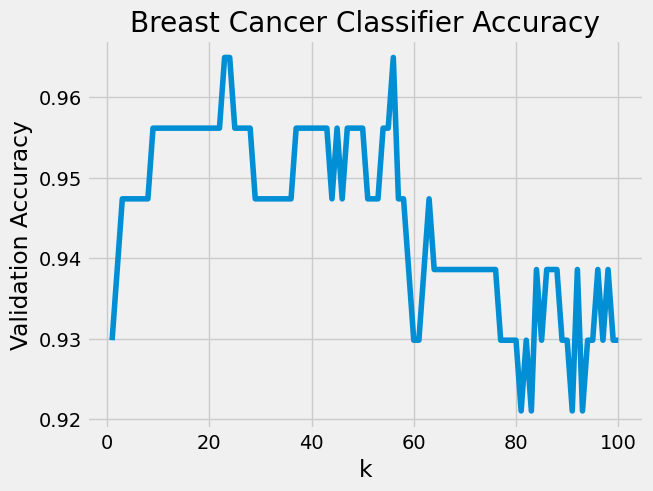

In [45]:
# We can now plot our data! Call plt.plot(). The first parameter should be k_list and the second parameter should be accuracies.

# After plotting the graph, show it using plt.show().

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.show()

